In [1]:
import pandas as pd
from itertools import combinations
from statistics import mean, pstdev, stdev
import matplotlib.pyplot as plt
import numpy as np

# Create the data of the companies

In [2]:
df = pd.read_excel('Worksheets for calculations.xlsx',sheet_name='Visualize CLT')
trunc_df = df.head(20)
df.head()

,Person names,Person age
0,P1,65
1,P2,6
2,P3,46
3,P4,23
4,P5,46


# Create combinations by taking n persons at a time
Sample size is appropriated. Not too small not too large

In [56]:
n_taken_at_a_time = 5
combination_of_companies = combinations(trunc_df['Person names'],n_taken_at_a_time)
combination_of_companies = list(combination_of_companies)
print('Total Combinations: {}'.format(len(combination_of_companies)))

Total Combinations: 15504


# Store the mean of samples

In [57]:
mean_ages_of_samples = []
for combination in combination_of_companies:
    sample_ages = []
    for persons in combination:
        sample_ages.append(trunc_df[trunc_df['Person names']==persons]['Person age'].values[0])
    mean_ages_of_samples.append(mean(sample_ages))

# Distribution of population age

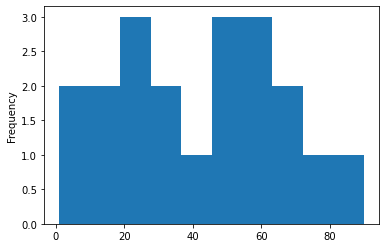

In [58]:
trunc_df['Person age'].plot.hist()

# Distributions of sample means

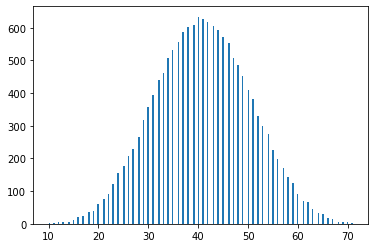

In [59]:
plt.hist(mean_ages_of_samples, bins=200)
plt.show()

# Create combinations by taking n persons at a time
Sample size is too large

In [47]:
n_taken_at_a_time = 19
combination_of_companies = combinations(trunc_df['Person names'],n_taken_at_a_time)
combination_of_companies = list(combination_of_companies)
print('Total Combinations: {}'.format(len(combination_of_companies)))

Total Combinations: 20


# Store the mean of samples

In [48]:
mean_ages_of_samples = []
for combination in combination_of_companies:
    sample_ages = []
    for persons in combination:
        sample_ages.append(trunc_df[trunc_df['Person names']==persons]['Person age'].values[0])
    mean_ages_of_samples.append(mean(sample_ages))

# Distribution of population age

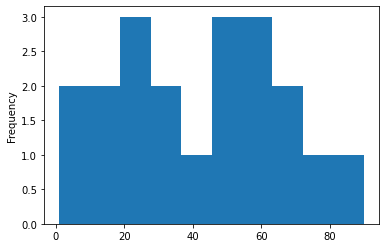

In [49]:
trunc_df['Person age'].plot.hist()

# Distributions of sample means

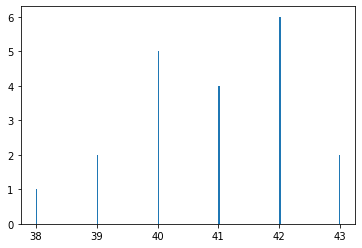

In [55]:
plt.hist(mean_ages_of_samples, bins=200)
plt.show()

# Create combinations by taking n persons at a time
Sample size is too small

In [69]:
n_taken_at_a_time = 1
combination_of_companies = combinations(trunc_df['Person names'],n_taken_at_a_time)
combination_of_companies = list(combination_of_companies)
print('Total Combinations: {}'.format(len(combination_of_companies)))

Total Combinations: 20


# Store the mean of samples

In [70]:
mean_ages_of_samples = []
for combination in combination_of_companies:
    sample_ages = []
    for persons in combination:
        sample_ages.append(trunc_df[trunc_df['Person names']==persons]['Person age'].values[0])
    mean_ages_of_samples.append(mean(sample_ages))

# Distribution of population age

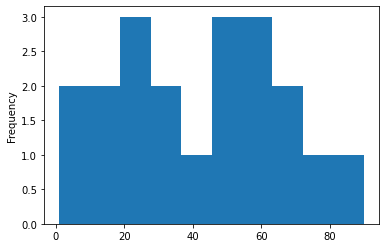

In [71]:
trunc_df['Person age'].plot.hist()

# Distributions of sample means

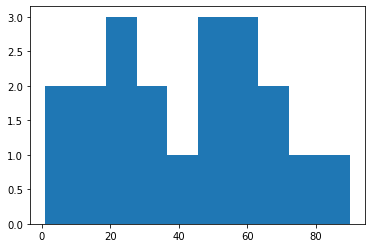

In [72]:
plt.hist(mean_ages_of_samples)
plt.show()

# Population Mean and Standard deviation

In [19]:
pop_mean = mean(trunc_df['Person age'].values)
pop_sd = pstdev(trunc_df['Person age'].values)
print('Population mean = {}'.format(pop_mean))
print('Population sd = {}'.format(pop_sd))

Population mean = 41
Population sd = 24.06241883103193


# Mean and Standard deviation of sample means

In [20]:
print('Mean of sample means: {}'.format(mean(mean_ages_of_samples)))
print('Standard deviation of mean ages of samples {}'.format(pstdev(mean_ages_of_samples)))

Mean of sample means: 40
Standard deviation of mean ages of samples 9.539392014169456


# Relationship with population standard deviation

In [21]:
pstdev(mean_ages_of_samples)*n_taken_at_a_time**0.5

21.330729007701542

# Observations and Inferences
 - Mean of sample means = mean of population
 - Also note that none of the sample mean is equal to the population mean. So suppose out of the population we take a sample it is least likely that the given sample's mean = population mean.
 - Standard deviation of sample means is a scaled version of Population standard deviations by a factor of sqrt(number of samples)
 - The distribution of sample means follow a normal distribution and the population distribution doesn't really matter. It can follow any horrible distribution it may like.

# Why mean and standard deviation are good point estimates?
If I slowly increase the size of my sample, what should happen to the sample mean and standard deviations? They should get closer and closer to the population parameter.

## Convergence of sample mean towards the population mean

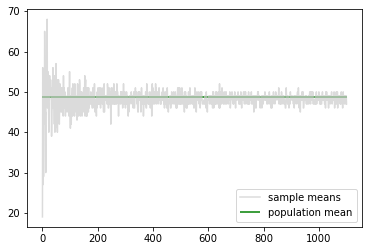

Population mean = 48.74272727272727


In [22]:
sample_means = []
sample_sizes = []
for sample_size in range(1,len(df)+1):
    sample_sizes.append(sample_size)
    # take a random sample of size sample_size from the population
    random_rows = np.random.randint(0,len(df),size=sample_size)
    sample_ages = []
    for rows in random_rows:
        # access the ages of the population
        sample_ages.append(df.iloc[rows,1])
    # store the sample means
    sample_means.append(mean(sample_ages))
# plot the variation of sample mean with sample size
plt.plot(sample_sizes, sample_means, color='0.80', alpha=0.70)
# plot the population mean
plt.hlines(mean(df['Person age']),xmin=0,xmax=len(df), colors='green')
# legends
plt.legend(['sample means','population mean'], loc ="lower right")
plt.show()
print('Population mean = {}'.format(mean(df['Person age'])))

## Convergence of sample standard deviation towards population standard deviation

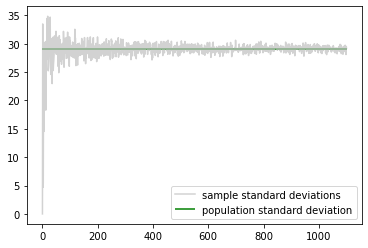

Population standard deviation = 29.1527044093711


In [23]:
sample_max = []
sample_sizes = []
for sample_size in range(1,len(df)+1):
    sample_sizes.append(sample_size)
    # take a random sample of size sample_size from the population
    random_rows = np.random.randint(0,len(df),size=sample_size)
    sample_ages = []
    for rows in random_rows:
        # access the ages of the population
        sample_ages.append(df.iloc[rows,1])
    # store the sample means
    sample_max.append(pstdev(sample_ages))
# plot the variation of sample mean with sample size
plt.plot(sample_sizes, sample_max, color='0.75', alpha=0.70)
# plot the population mean
plt.hlines(pstdev(df['Person age']),xmin=0,xmax=len(df), colors='green')
# legends
plt.legend(['sample standard deviations','population standard deviation'], loc ="lower right")
plt.show()
print('Population standard deviation = {}'.format(pstdev(df['Person age'])))

## Will other sample statistics (e.g. sample max) converge towards the population mean?

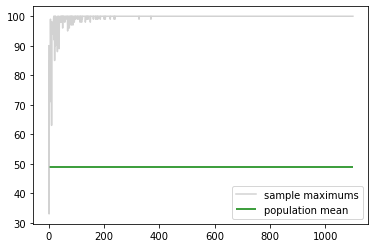

Population mean = 29.1527044093711


In [24]:
sample_max = []
sample_sizes = []
for sample_size in range(1,len(df)+1):
    sample_sizes.append(sample_size)
    # take a random sample of size sample_size from the population
    random_rows = np.random.randint(0,len(df),size=sample_size)
    sample_ages = []
    for rows in random_rows:
        # access the ages of the population
        sample_ages.append(df.iloc[rows,1])
    # store the sample means
    sample_max.append(max(sample_ages))
# plot the variation of sample mean with sample size
plt.plot(sample_sizes, sample_max, color='0.75', alpha=0.70)
# plot the population mean
plt.hlines(mean(df['Person age']),xmin=0,xmax=len(df), colors='green')
# legends
plt.legend(['sample maximums','population mean'], loc ="lower right")
plt.show()
print('Population mean = {}'.format(pstdev(df['Person age'])))

<b>Inference:</b> Thus we can see that sample mean is a good estimate of population mean. Other statistics of sample is not a good estimate of population mean.

# Estimator of population proportion
Suppose we want to estimate proportion of people with age > mean. First we will see what our population proportion is saying.

In [25]:
def check_age(age, mean):
    if age > mean:
        return 1
    else:
        return 0
trunc_df['age_gt_mean'] = trunc_df['Person age'].apply(lambda row: check_age(row, trunc_df['Person age'].mean()))
n_age_gt_mean = trunc_df['age_gt_mean'].sum()
print('Number of people with age > mean = {}'.format(n_age_gt_mean))
print('Population proportion of people with age > mean = {}'.format(n_age_gt_mean/len(trunc_df)))

Number of people with age > mean = 11
Population proportion of people with age > mean = 0.55


C:\Users\sandipto.sanyal\.conda\envs\tensorflow-cpu2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Store the sample proportions
Below we will do the same thing for the samples

In [26]:
sample_proportions = []
for combination in combination_of_companies:
    sample_ages = []
    for persons in combination:
        # store the sample ages
        sample_ages.append(trunc_df[trunc_df['Person names']==persons]['Person age'].values[0])
    mean_age = mean(sample_ages)
    # store the proportions of people with age > the mean ages of the given sample
    proportion = map(lambda age: check_age(age,mean_age), sample_ages)
    sample_proportions.append(mean(list(proportion)))

## Distribution of sample proportions
Below we will see the distribution that we got for the sample proportions

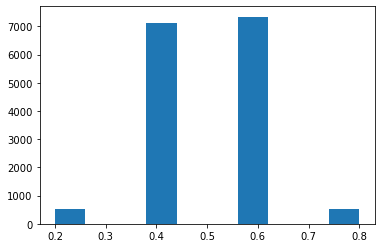

In [27]:
plt.hist(sample_proportions)
plt.show()

In [28]:
print('Mean of sample proportions = {}'.format(mean(sample_proportions)))
print('Standard deviation of sample proportions = {}'.format(stdev(sample_proportions)))

Mean of sample proportions = 0.5012899896800825
Standard deviation of sample proportions = 0.12379176766655815


In [29]:
0.55*(1-0.55)/n_taken_at_a_time**0.5

0.11068536488623959

<b>Inference: </b>Though this is not clear with such a low population and sample size but the distribution of sample proportions look like a normal distribution with mean ~ population proportion and std. deviation ~ population proportionx(1 - population proportion)/sqrt(n)